In [1]:
import pandas as pd
import numpy as np
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder

In [2]:
"""
To-Dos:

i. Apply feature scaling
ii. Apply dimentionality reduction
iii. Test with predicted values in training data
iv. Evaluate against other supervised learning algorithms
"""  

'\nTo-Dos:\n\ni. Apply feature scaling\nii. Apply dimentionality reduction\niii. Test with predicted values in training data\niv. Evaluate against other supervised learning algorithms\n'

In [3]:
# Load the data from the CSV file
data = pd.read_csv('D:\Learnings\datasets\dataset.csv')

In [4]:
# lets drop the rows with empty cells, later we will instead use predicted values

data.replace('', np.nan, inplace=True)
data.dropna(inplace=True)

In [5]:
# Load the data and prepare the features and labels
#X = data.drop(['Target'], axis=1)
X = data[['pH', 'Iron', 'Nitrate', 'Chloride', 'Lead', 'Zinc', 'Color',
          'Turbidity', 'Fluoride', 'Copper', 'Odor', 'Sulfate', 'Conductivity',
          'Chlorine', 'Manganese', 'Total Dissolved Solids', 'Source',
          'Water Temperature', 'Air Temperature', 'Month', 'Day', 'Time of Day']]
y = data['Target']

In [6]:
# these columns have strings, encode them

string_columns = data.select_dtypes(include=['object']).columns.tolist()

# Print the names of the string columns
print(string_columns)

['Color', 'Source', 'Month']


In [7]:
#clean the data here
le = LabelEncoder()
#string_columns = ['Source', 'Month', 'Color']
X.loc[:,string_columns] = X[string_columns].apply(lambda col: le.fit_transform(col))

C:\Users\gites\AppData\Local\Temp\ipykernel_12928\275804703.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.loc[:,string_columns] = X[string_columns].apply(lambda col: le.fit_transform(col))


In [9]:

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the decision tree on the training data
clf = tree.DecisionTreeClassifier(criterion='gini',max_depth=4,random_state=1)
clf.fit(X_train, y_train)

# Make predictions on the test data
y_pred = clf.predict(X_test)

# Evaluate the performance of the model
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)


Accuracy: 0.8358380631875031


In [15]:
#list(X.columns)

[Text(0.5, 0.9, 'Manganese <= 0.05\ngini = 0.423\nsamples = 3185440\nvalue = [2219383, 966057]'),
 Text(0.25, 0.7, 'Turbidity <= 1.089\ngini = 0.357\nsamples = 2734607\nvalue = [2097440, 637167]'),
 Text(0.125, 0.5, 'Chloride <= 250.701\ngini = 0.306\nsamples = 2507257\nvalue = [2035354, 471903]'),
 Text(0.0625, 0.3, 'Copper <= 1.051\ngini = 0.254\nsamples = 2339528\nvalue = [1989719, 349809]'),
 Text(0.03125, 0.1, 'gini = 0.209\nsamples = 2220147\nvalue = [1957354, 262793]'),
 Text(0.09375, 0.1, 'gini = 0.395\nsamples = 119381\nvalue = [32365, 87016]'),
 Text(0.1875, 0.3, 'Air Temperature <= 70.615\ngini = 0.396\nsamples = 167729\nvalue = [45635, 122094]'),
 Text(0.15625, 0.1, 'gini = 0.398\nsamples = 121008\nvalue = [33218, 87790]'),
 Text(0.21875, 0.1, 'gini = 0.39\nsamples = 46721\nvalue = [12417, 34304]'),
 Text(0.375, 0.5, 'Iron <= 1.164\ngini = 0.397\nsamples = 227350\nvalue = [62086, 165264]'),
 Text(0.3125, 0.3, 'Chlorine <= 6.735\ngini = 0.396\nsamples = 212747\nvalue = [5790

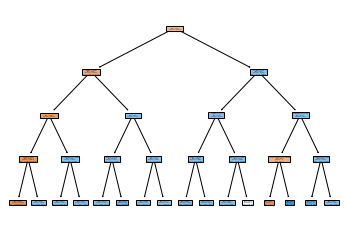

In [17]:
tree.plot_tree(clf,feature_names= list(X.columns),filled = True)

In [10]:
"""
document: 
1. Using DecisionTreeClassifier,
     training on 80% data, test on 20%, removed rows with empty cells
         accuracy: 83.15%
         
    We will try and test with these decision-tree parameters:
        criterion='gini',max_depth=4,random_state=1
        accuracy: 83.58%
         
""" 

'\ndocument: \n1. Using DecisionTreeClassifier,\n     training on 80% data, test on 20%, removed rows with empty cells\n         accuracy: 83.15%\n         \n'